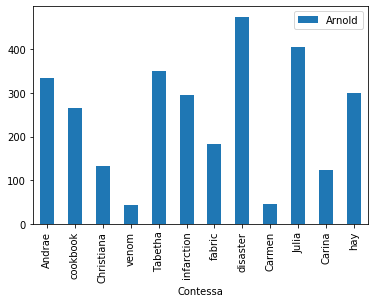

<Figure size 3600x432 with 0 Axes>

In [107]:
import random
import pandas as pd
import matplotlib.pyplot as plt

nouns = []
vocab_file_name='nounlist.txt'
with open(vocab_file_name) as voc_file:
        for token in voc_file:
            nouns.append(token.rstrip())
for k in range(0,1):
    numLabX = random.randint(5,20)

    randLabs = []
    for i in range(0, numLabX):
        randNoun = random.randint(0,len(nouns)-1)
        randLabs.append(nouns[randNoun])

    valRange = random.randint(10,1000)
    nums = []
    for i in range(0,numLabX):
        yVal = random.randint(0,valRange)
        nums.append(yVal)

    randY = random.randint(0,len(nouns)-1)
    yLab = nouns[randY]
    randX = random.randint(0,len(nouns)-1)
    xLab = nouns[randX]

    dataDic = {}
    for i in range(0, len(randLabs)):
        dataDic[randLabs[i]] = nums[i]
    data = {}
    data[yLab] = nums
    data[xLab] = randLabs
    df = pd.DataFrame(data, columns= [yLab, xLab])
    csvPath = 'data/dataframe' + str(k) + '.csv'
    df.to_csv(csvPath, index = False, header=True)
    df.plot(x =xLab, y=yLab, kind = 'bar')
    plt.figure(figsize=(50,6))
    bpath = "data/bar" + str(k) + ".png"
#     plt.xticks(rotation=0)
#     plt.savefig(bpath, bbox_inches='tight')
#     plt.show()
    lab_ques(nums, randLabs, xLab, yLab, k)
    val_ques(nums, randLabs, xLab, yLab, k)
    op_ques(nums, randLabs, xLab, yLab, k)

In [89]:
import inflect
import random
p = inflect.engine()
def lab_ques(nums, randLabs, xLab, yLab, iteration):
    labels = ['x-axis', 'y-axis']
    valOrLab = [['label', 'value'], ['labels', 'values']]
    areOrIs = ['is the', 'are the']
    last = ['to last', 'from the end']
    quesOcom = ['what', 'tell me the', 'read me the']
    pluralFoL = ['first', 'last']
    titleOrName = ['title', 'name']

    path = "data/ques" + str(iteration) + ".txt"
    f = open(path, "w")
    for i in range(0,3):
        question = random.randint(0,2)
    #     question = 1
        plural = random.randint(0,1)
        xOrY = random.randint(0,1)
        FoL = random.randint(0,1)
        labelVal = random.randint(0,1)
        number = random.randint(1,numLabX)
        numStr = p.number_to_words(p.ordinal(number))
        numStrP = p.number_to_words(number)

        if number == 1:
            plural = 0

        quesStr = ''
        if question == 0:
            quesStr = quesStr + quesOcom[0] + ' ' + areOrIs[plural] 
        else:
            quesStr = quesStr + quesOcom[question]
        if plural == 1:
            quesStr = quesStr + ' ' + pluralFoL[FoL] + ' ' + numStrP
        else:
            if FoL == 1:
                lastInt = random.randint(0,1)
                if number == 1:
                    quesStr = quesStr + ' ' + 'last'
                else:
                    quesStr = quesStr + ' ' + numStr + ' ' + last[lastInt]
            else:
                quesStr = quesStr + ' ' + numStr
        quesStr = quesStr + ' ' + labels[xOrY] + ' ' + valOrLab[plural][labelVal]
    #     quesStr = "hi hi hi hi hi hi hi"
        quesStr = quesStr
        vals = []

        if plural == 0:
            if FoL == 0:
                if xOrY == 0:
                    vals.append(randLabs[number-1])
                else:
                    vals.append(nums[number-1])
            else:
                if xOrY == 0:
                    vals.append(randLabs[number*-1])
                else:
                    vals.append(nums[number*-1])
        else:
            if FoL == 0:
                if xOrY == 0:
                    for i in range(0,number):
                        vals.append(randLabs[i])
                else:
                    for i in range(0,number):
                        vals.append(nums[i])
            else:
                if xOrY == 0:
                    for i in range((number*-1), 0):
                        vals.append(randLabs[i])
                else:
                    for i in range((number*-1), 0):
                        vals.append(nums[i])

        for j in range(0,len(vals)):
            if j == 0:
                quesStr = quesStr + ":" + str(vals[j])
            else:
                quesStr = quesStr + "," + str(vals[j])
    #     print(vals)
#         print(quesStr)     
        f.write(quesStr + "\n")
    for i in range(0,2):
        ans = []
        question = random.randint(0,2)
        xOrY = random.randint(0,1)
        titleInt = random.randint(0,1)
        titleStr = ''
        if question == 0:
            titleStr = titleStr + quesOcom[0] + ' ' + areOrIs[0] 
        else:
            titleStr = titleStr + quesOcom[question]
        titleStr = titleStr + ' ' + labels[xOrY] + ' ' + titleOrName[titleInt]
    #     titleStr = "hi hi hi hi hi hi hi"
        titleStr = titleStr
        if xOrY == 0:
            titleStr = titleStr + ":" + xLab
        else:
            titleStr = titleStr + ":" + yLab
#         print(titleStr)

        f.write(titleStr + "\n")
    f.close()

In [90]:
### Type two questions: retrieving values from graph
def val_ques(nums, randLabs, xLab, yLab, iteration):
    path = "data/ques" + str(iteration) + ".txt"
    f = open(path, "a")
    for i in range(0,5):
        quesOcom = ['what is the', 'tell me the', 'read me the']
        valueStrs = ["value", "amount", "number"]
        valOrNoun = random.randint(0,1)
        whenOrNot = random.randint(0,1)
        labNum = random.randint(0,len(randLabs)-1)

        question = random.randint(0,2)
    #     question = 2
        quesStr = ''
        quesStr = quesStr + quesOcom[question]

        if valOrNoun == 0:
            valInt = random.randint(0,2)
            quesStr = quesStr + ' ' + valueStrs[valInt]
        else:

            randNoun = random.randint(0,len(nouns)-1)
            quesStr = quesStr + ' ' + str(yLab)

        if whenOrNot == 0:

            randNoun = random.randint(0,len(nouns)-1)
            quesStr = quesStr + ' for ' + randLabs[labNum]
        else:
            quesStr = quesStr + ' when ' + str(xLab) + ' is ' + randLabs[labNum]
    #     quesStr = "what what what what what what"

        quesStr = quesStr + ":" + str(nums[labNum])
#         print(quesStr)
        f.write(quesStr + "\n")
    f.close()

In [91]:
### Type 3 questions: computation on data

import statistics
def op_ques(nums, randLabs, xLab, yLab, iteration):
    path = "data/ques" + str(iteration) + ".txt"
    f = open(path, "a")
    for i in range(0,5):
        operations = ["mean", "average", "median", "mode", "range", "max", "largest", "maximum", "biggest", "tallest", "highest", "min", "smallest", "minimum", "lowest", "shortest"]
        minMax = ['largest', 'max', 'maximum', 'min', 'smallest', 'minimum', 'median']
        quesOcom = ['what is the', 'tell me the', 'read me the']
        question = random.randint(0,2)
    #     question = 0
        opInt = random.randint(0,15)
        opMax = random.randint(0,2)

        quesStr = ''
        quesStr = quesStr + quesOcom[question]
        mmInt = random.randint(0,6)
        if opMax == 2:
            randNoun = random.randint(0,len(nouns)-1)

            quesStr = 'which ' + xLab + ' is the ' + minMax[mmInt]
        else:
            quesStr = quesStr + ' ' + operations[opInt]
    #         print("here " + quesStr + ' ' + str(opInt))
            dataOnoun = random.randint(0,3)
            randNoun = random.randint(0,len(randLabs)-1)
            if dataOnoun == 0:
                quesStr = quesStr + ' of the data'
            elif dataOnoun == 1:
                quesStr = quesStr + ' of the ' + xLab
            elif dataOnoun == 2:
                valn = random.randint(0,1)
                if valn == 0:
                    quesStr = quesStr + ' value'
                else:
                    quesStr = quesStr + ' ' +  yLab

    #     quesStr = "home home home home home home"
        finAns = ''
        if opMax == 2:
            if mmInt == 6:
                el = statistics.median_high(nums)
                finAns = randLabs[nums.index(el)]
            elif mmInt < 3:
                el = max(nums)
                finAns = randLabs[nums.index(el)]
            else:
                el = min(nums)
                finAns = randLabs[nums.index(el)]
        else:
            if opInt < 2:
                finAns = statistics.mean(nums)
            elif opInt < 3:
                finAns = statistics.median(nums)
            elif opInt < 4:
                try:
                    finAns = statistics.mode(nums)
                except:
                    finAns = "none"
            elif opInt < 5:
                finAns = max(nums) - min(nums)
            elif opInt < 11:
                finAns = max(nums)
            else:
                finAns = min(nums)
        quesStr = quesStr + ':' + str(finAns)
#         print(quesStr)
        f.write(quesStr + "\n")
    f.close()